In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
VERBOSE = True
PUBLISH = True
if not PUBLISH:
    %matplotlib widget
else:
    %matplotlib inline

In [4]:
### 週販レポート
# 標準ライブラリ
import os
import sys
from pathlib import Path
from datetime import datetime, timedelta

# サードパーティライブラリ
import polars as pl
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
import gamedata as g

In [5]:
# 出力関数登録
def outfunc(fig: Figure) -> None:
    if PUBLISH:
        display(fig)
    else:
        plt.show()
g.set_dispfunc(outfunc)

In [6]:
# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = g.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not PUBLISH else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

if PUBLISH and not VERBOSE:
    g.set_transparent_mode(True)
else:
    g.set_transparent_mode(False)


In [7]:
show_title(report_date)

# 国内ゲームハード週販レポート (2026-02-01) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 2026/1/11は2週合算だったため､データは処理上の都合､週次値に変換するため1/4と1/11に等分しています｡
* [過去の週販レポート](../index.html)

## 直近4週間のハード売り上げ／累計推移

In [8]:
df1 = g.load_hard_sales()
style1 = g.chart_units_by_date_hw(df1, begin=g.weeks_before(report_date, 3), end=report_date)
display(style1)

2026年2月3日の任天堂3Q決算で､
Nintendo Switch2の日本国内における12月末時点でのセルイン(メーカー出荷)累計は､
478万台と発表されました｡
ファミ通の推計値(セルスルー)による12月末時点の値は378万台｡
その差はおおよそ100万台｡セルインとセルスルーなので流通在庫分の差が出るのは当然なのですが､
年末商戦で100万台在庫が眠ってたというのも無理がありそうなので､いずれ累計値補正が入ると思います｡
Switch2についてはロンチで下方補正が入った前例もありますし｡

ただ､今週は補正はありませんでした｡
集計値発表の2日前に補正はさすがに無理なので､これは仕方ないです｡
2月6日から[マイニンテンドーストアで先着販売](https://store-jp.nintendo.com/switch2)も始まっています｡
直販の累計への影響をモデル化するのは難しそうです｡

今週のSwitch2は先週とほぼ変わらずの7万台でした｡この3週間は安定して高水準です｡

PS5は1万台を僅かに上回りました｡しかも､なんとNintendo Switchを上回りました｡

Switchの減少著しく 10678台は **歴代最低** の週販です｡
量販店や通販で在庫切れも出ているので､出荷自体が減少している様子です｡



## 週販推移

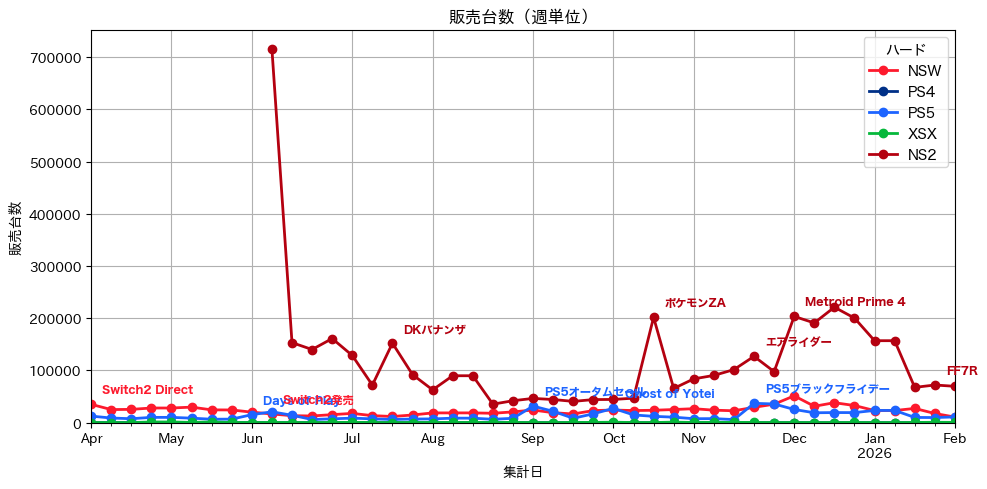

In [9]:
(weekly_fig, weekly_df) = g.plot_sales(begin=g.report_begin(report_date), end=report_date, event_mask=g.EVENT_MASK_MIDDLE)


### 週販推移(拡大）

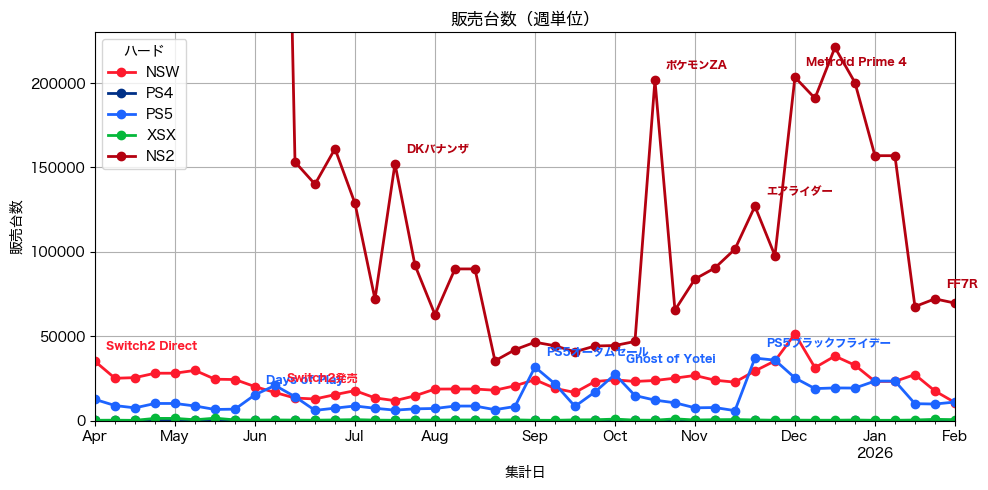

In [10]:
(weekly_big_fig, weekly_big_df) = g.plot_sales(begin=g.report_begin(report_date), end=report_date, ymax=230000, event_mask=g.EVENT_MASK_MIDDLE)


しばらくはNintendo Switch2が7万前後で､PS5とSwitchが1万台前後で推移するのが続くのでしょうか｡


### SwitchとSwitch2:初年の年末商戦後の推移比較

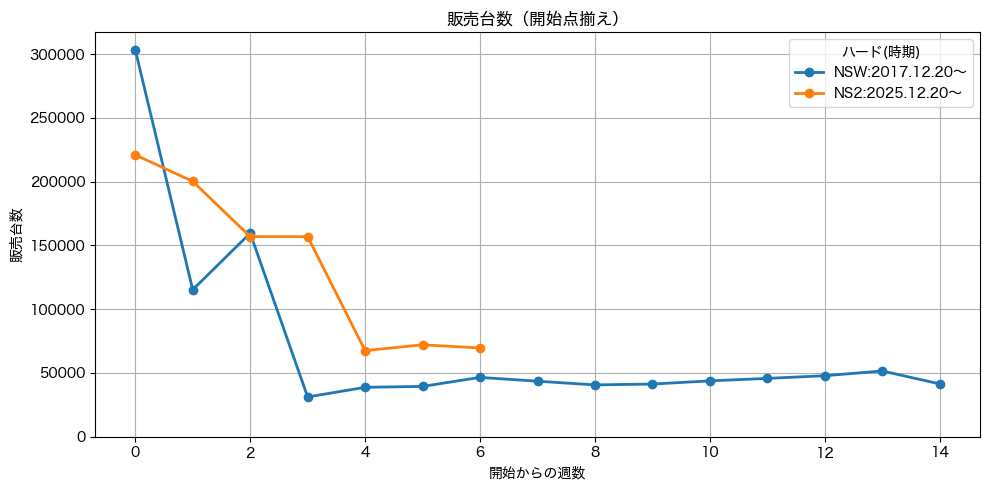

In [11]:
(pso_ns2_fig, pso_ns2_df) = g.plot_sales_with_offset(
                              hw_periods=[
                              {'hw': 'NSW', 'begin': datetime(2017,12,20)},
                              {'hw': 'NS2', 'begin': datetime(2025,12,20)},
                              ],
                          end = 15)


ホリデーシーズン後のSwitchとSwitch2の推移を比較するために､
Nintendo Switchの2017/12/20以降とNintendo Switch2の2025/12/20以降の週販のグラフを示します｡

商戦後に落ち込むのはSwitchもSwitch2も同じですが､
Switchは5万台未満で推移するのに比べ､Switch2は7万台前後の推移になっています｡
その差は2万台/週｡Switch2の高い需要が継続しています｡
(先週からコメントを書き換える部分がない...)



### PS5の直近3年間の年末商戦後の推移比較

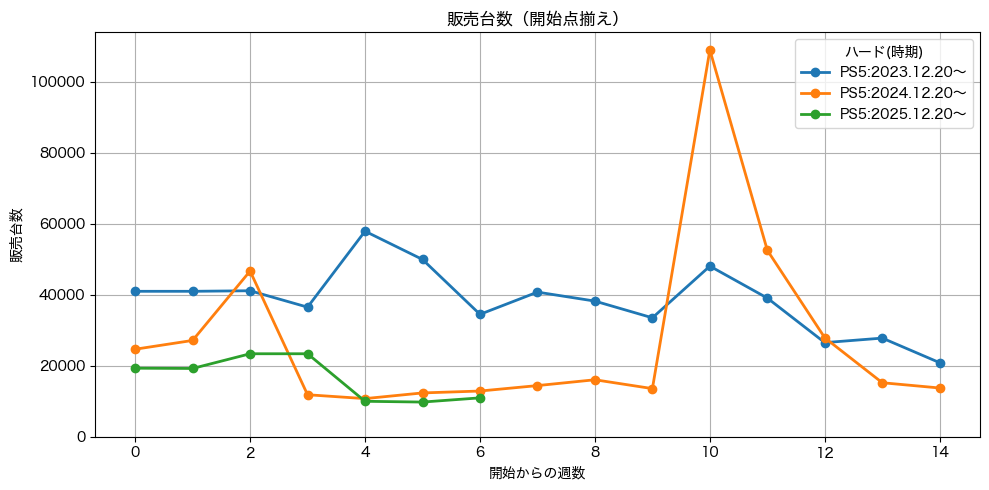

In [12]:
(psps5_fig, psps5_df) = g.plot_sales_with_offset(
                              hw_periods=[
                              {'hw': 'PS5', 'begin': datetime(2023,12,20)},
                              {'hw': 'PS5', 'begin': datetime(2024,12,20)},
                              {'hw': 'PS5', 'begin': datetime(2025,12,20)},
                              ],
                          end = 15)

PS5DE日本語版の値下げ効果がホリデーシーズン後も継続しているか確認するために､
PS5の2023/12/20, 2024/12/20, 2025/12/20以降の週販のグラフを示します｡

2025年は12月中の年末商戦の段階で2023年､2024年を下回っています｡
ホリデー後も昨年を下回る水準が継続しており､値下げは販売台数を増加させる事は出来ていません｡
(こちらも先週からコメントを書き換える部分がありません)


## 月間販売推移

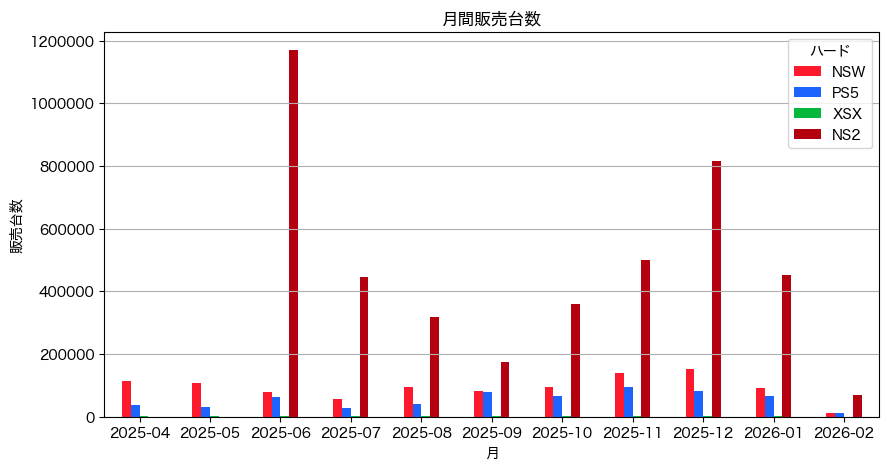

In [13]:
(mbh_fig, mbh_df) = g.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=g.report_begin(report_date), end=report_date,
                                        stacked=False)


In [14]:

month_style = g.style_sales(mbh_df.tail(1))
display(month_style)

,NSW,PS5,XSX,NS2
year_month,,,,
2026-02,"10,678","10,949",525,"69,586"


### Nintendo Switchの月間販売台数： 前々年､前年との比較

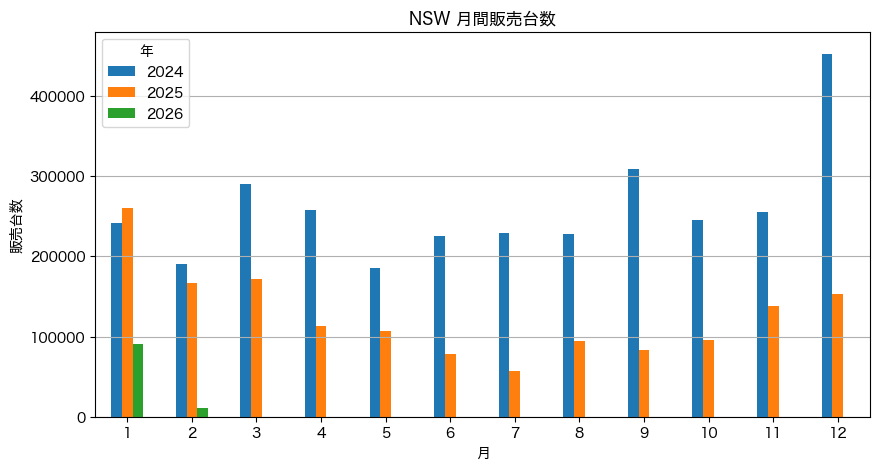

In [15]:
(my_ns_fig, my_ns_df) = g.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=g.years_ago(report_date), end=report_date)


In [16]:
if True:
    this_year = report_date.year
    my_ns_df2 = my_ns_df.drop(str(this_year - 2))
    my_ns_df2 = my_ns_df2.with_columns(
        (pl.col(str(this_year)) / pl.col(str(this_year - 1))).alias("YoY")
    )
    my_ns_style = g.style_sales(my_ns_df2, percent_columns=["YoY"], columns= [str(this_year), str(this_year -1)])
    display(my_ns_style)


,2025,2026,YoY
month,,,
1,"260,447","91,109",35.0%
2,"167,188","10,678",6.4%
3,"171,921",0,0.0%
4,"113,513",0,0.0%
5,"106,506",0,0.0%
6,"78,097",0,0.0%
7,"57,532",0,0.0%
8,"94,517",0,0.0%
9,"82,946",0,0.0%


2月は前年比25%に落ち込む状況です｡
この状況が続くと2月全体として4万台前後になりますが､
月間ワーストである2025年7月を下回る可能性は高いです｡

しかし､この先のSwitchは毎月ワースト更新かも知れませんね｡それが世代交代です｡

### PlayStation 5の月間販売台数： 前々年､前年との比較


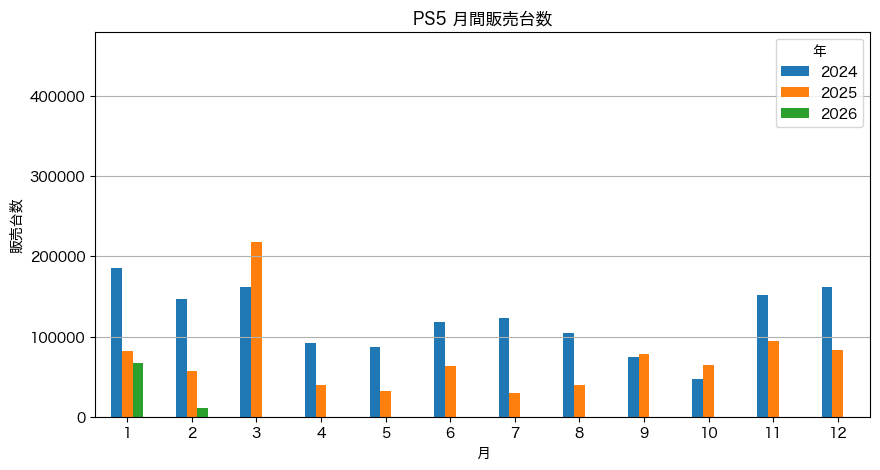

In [17]:
(my_ps5_fig, my_ps5_df) = g.plot_monthly_bar_by_year(hw="PS5", ymax=480000, 
                                        begin=g.years_ago(report_date), end=report_date)


In [18]:
if True:
    this_year = report_date.year
    my_ps5_df = my_ps5_df.drop(str(this_year - 2))
    my_ps5_df = my_ps5_df.with_columns(
        (pl.col(str(this_year)) / pl.col(str(this_year - 1))).alias("YoY")
    )
    ps5_monthly_style = g.style_sales(my_ps5_df, percent_columns=["YoY"], columns=[str(this_year), str(this_year - 1)])
    display(ps5_monthly_style)


,2025,2026,YoY
month,,,
1,"81,587","66,502",81.5%
2,"56,886","10,949",19.2%
3,"218,300",0,0.0%
4,"38,983",0,0.0%
5,"32,001",0,0.0%
6,"63,516",0,0.0%
7,"28,959",0,0.0%
8,"39,004",0,0.0%
9,"78,693",0,0.0%


2月はまだ1週分ですが､このまま推移すると1月と同様に前年比80%程度で落ち着きそうです｡


## 累計販売推移


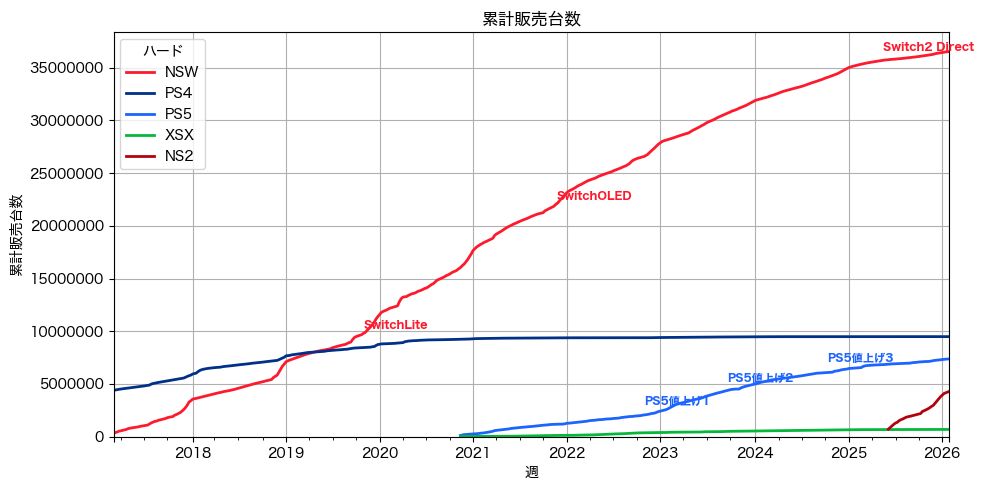

In [19]:
long_range_event_mask = g.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(cumulative_sales_fig, cumulative_sales_df) = g.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = g.EVENT_MASK_LONG)


In [20]:
cs_style = g.style_sales(cumulative_sales_df.tail(1), datetime_index=True)
display(cs_style) if VERBOSE else None

,NSW,PS4,PS5,XSX,NS2
report_date,,,,,
2026-02-01,"36,517,948","9,491,113","7,375,661","691,356","4,307,086"


## Switch2初動状況

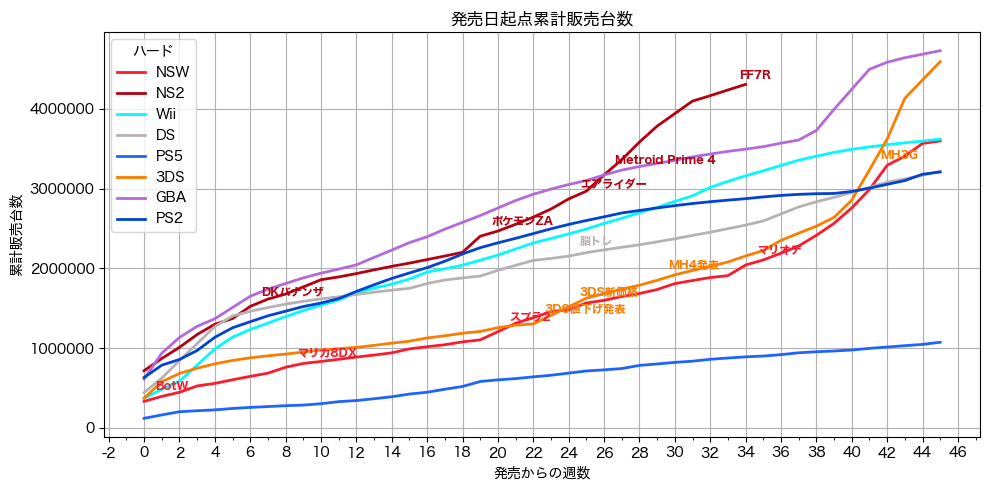

In [21]:
(csd_ns2_fig, csd_ns2_df) = g.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=45,
                                        event_mask=g.EVENT_MASK_MIDDLE)


In [22]:
df12 = csd_ns2_df.filter(pl.col("delta_week") == 33).drop("delta_week")
df12_unpivot = df12.unpivot(
    index=None,
    variable_name="ハード",
    value_name="販売数"
).sort("販売数", descending=True)

styled_df12_unpivot = g.style_sales(df12_unpivot, columns=['販売数'], bars=['販売数'])
display(styled_df12_unpivot)


,販売数
ハード,
NS2,"4,237,500"
GBA,"3,467,042"
Wii,"3,090,509"
PS2,"2,855,375"
DS,"2,497,605"
3DS,"2,079,329"
NSW,"1,908,127"
PS5,"874,937"


Switch2の累計補正があった場合､
歴代最速1位をさらに強化しますが､
400万台到達最速記録の具体値が「不明」になってしまうのも寂しいですね｡

## 年単位の状況


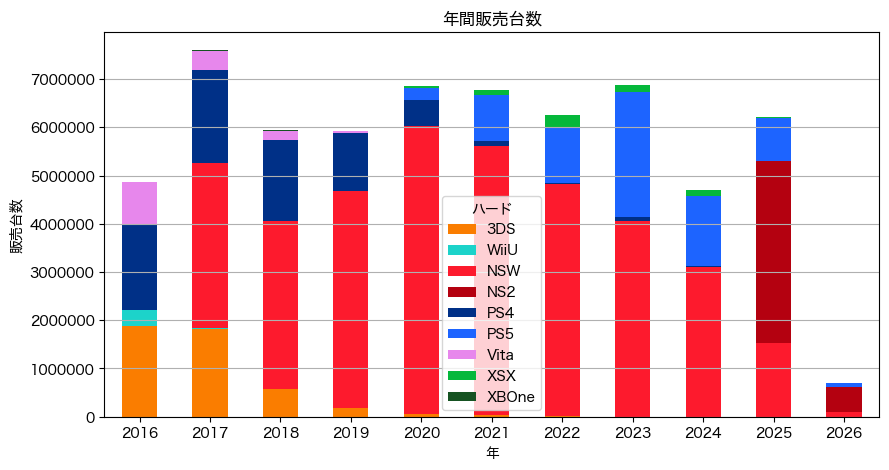

In [23]:
(yb_fig, yb_df) = g.plot_yearly_bar_by_hard(hw=['3DS', 'WiiU','NSW', 'NS2',  'PS4', 'PS5', 'Vita', 'XSX', 'XBOne'], 
                                       begin=g.years_ago(report_date, 10),
                                       end=report_date, stacked=True)


In [24]:
yb_df = yb_df.with_columns(
    pl.sum_horizontal(pl.exclude("year")).alias("合計")
)
yearly_style = g.style_sales(yb_df)
display(yearly_style)


,3DS,WiiU,NSW,NS2,PS4,PS5,Vita,XSX,XBOne,合計
year,,,,,,,,,,
2016,"1,874,457","336,151",nan,nan,"1,790,883",nan,"865,002",nan,"8,897","4,875,390"
2017,"1,827,131","21,817","3,407,158",nan,"1,935,247",nan,"396,207",nan,"14,664","7,602,224"
2018,"566,420",nan,"3,482,388",nan,"1,695,227",nan,"181,728",nan,"15,339","5,941,102"
2019,"191,173",nan,"4,493,903",nan,"1,196,153",nan,"37,668",nan,"8,315","5,927,212"
2020,"62,761",nan,"5,956,943",nan,"542,647","255,150",nan,"31,424","3,585","6,852,510"
2021,"28,540",nan,"5,579,127",nan,"104,054","968,185",nan,"97,234",nan,"6,777,140"
2022,"10,664",nan,"4,804,546",nan,"22,823","1,154,054",nan,"269,737",nan,"6,261,824"
2023,"3,033",nan,"4,062,609",nan,"73,292","2,587,468",nan,"141,712",nan,"6,868,114"
2024,162,nan,"3,109,103",nan,"13,728","1,454,149",nan,"118,221",nan,"4,695,363"


### 年単位のメーカーシェア

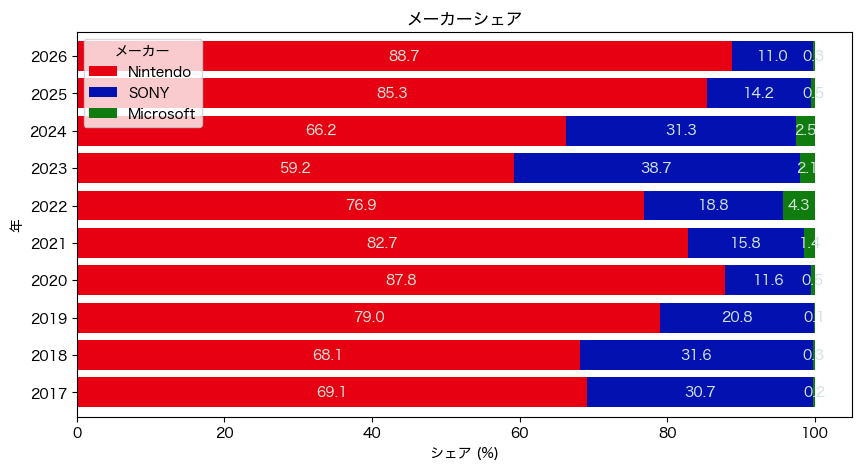

In [25]:
(msb_fig, msb_df) = g.plot_maker_share_bar(begin=datetime(2017, 1, 1))

任天堂のシェアは88.9%から88.7%に僅かに減少しました｡
これはSwitchの落ち込みの影響です｡
今後はSwitchは減り続けるので､Switch2とPS5の比がそのままメーカーシェアになっていくものと思われます｡

In [26]:
if VERBOSE:
    # msb_dfのyear以外のカラムの全ての値を100で割る
    msb_df = msb_df.with_columns(
        [ (pl.col(col) / 100).alias(col) for col in msb_df.columns if col != "year" ]
    )
    share_style = g.style_sales(msb_df, percent_columns=msb_df.columns[1:])
    share_style = share_style.background_gradient(cmap='Blues', axis=0)
    display(share_style)


,Nintendo,SONY,Microsoft
year,,,
2017,69.1%,30.7%,0.2%
2018,68.1%,31.6%,0.3%
2019,79.0%,20.8%,0.1%
2020,87.8%,11.6%,0.5%
2021,82.7%,15.8%,1.4%
2022,76.9%,18.8%,4.3%
2023,59.2%,38.7%,2.1%
2024,66.2%,31.3%,2.5%
2025,85.3%,14.2%,0.5%


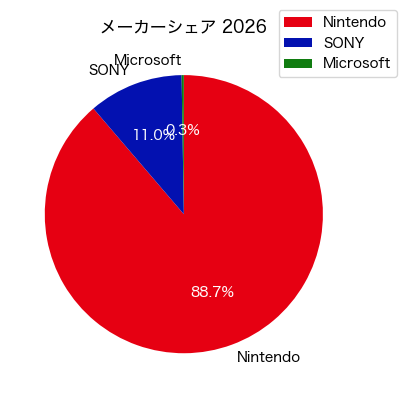

In [27]:
if VERBOSE:
    (fig, df) = g.plot_maker_share_pie(begin_year=2026, end_year=2026)